In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os
import random
import matrixprofile as mp
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import statistics
from collections import Counter
import pyarrow as pa
import pyarrow.parquet as pq
import os
from collections import OrderedDict
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats.distributions as dist
from scipy.stats import wilcoxon
sns.set_style("whitegrid")

In [2]:
# Tests chosen using diagrams from here: https://www.youtube.com/watch?v=rulIUAN0U3w
# and here: https://help.xlstat.com/s/article/which-statistical-test-should-you-use?language=en_US

In [3]:
# Videos Automated on v68

In [4]:
tempTopDir = '/Volumes/Britt_SSD/ReDoEvals3/UserStudy/'
filePath = os.path.join(tempTopDir, 'GP_Main.parquet')

In [5]:
taskDF = pd.read_parquet(filePath)
taskDF['ParticipantNum'] = taskDF["ParticipantPrivateID"]
taskDF = taskDF.astype({"ParticipantPrivateID": str})
filePath = os.path.join(tempTopDir, 'likertSlim.parquet')
likertSlim = pd.read_parquet(filePath)

print(len(likertSlim['ParticipantPublicID'].unique()))

232


In [390]:

thisDF = likertSlim.copy()
# drop particpants who have not been accepted (rejected or timed out)
# options: approved, awaiting review,rejected, returned, timed-out
print(thisDF.ExperimentVersion.unique())
print(thisDF.status.unique())
# get names of indexes for which to drop
# pID_removed1 = thisDF[(thisDF['status']=='REJECTED') | 
#                       (thisDF['status']=='RETURNED')].ParticipantPublicID.unique()
pID_removed1 = thisDF[(thisDF['status']!='APPROVED')].ParticipantPublicID.unique()
pID_removed2 = thisDF[(thisDF['status']=='RETURNED')].ParticipantPublicID.unique()
index_names = thisDF[(thisDF['status']!='AWAITING REVIEW') & (thisDF['status']!='APPROVED')].index
likertSlim = likertSlim[~likertSlim['ParticipantPublicID'].isin(pID_removed1)].copy()
  
# drop these given row
# indexes from dataFrame
# thisDF = thisDF[~thisDF['ParticipantPublicID'].isin(pID_removed2)].copy()
# tmp_thisDF = thisDF[~thisDF['ParticipantPublicID'].isin(pID_removed1)].copy()
# print(tmp_thisDF.status.unique())
# print(pID_removed1)

tmp_taskDF = taskDF[~taskDF['ParticipantPublicID'].isin(pID_removed1)].copy()

# print(tmp_taskDF[tmp_taskDF['ParticipantPublicID']==pID_removed1[-3]])
print(len(likertSlim))
# earlyV = likertSlim.query('ExperimentVersion<68')
# print(len(earlyV))
# lateV = likertSlim.query('ExperimentVersion>=68')
# print(len(lateV))

[60. 62. 64. 65. 67. 70. 72. 73. 76. 77.]
['APPROVED']
232


In [391]:
#################################################################
#################################################################
#################################################################
#################################################################
##################Create a set of DFs ###########################
#################################################################
#################################################################
#################################################################
#################################################################

In [392]:
# What if we drop those who missed 2 or more atn checks?

thisDF = likertSlim.copy()

print(thisDF.Suspicious.unique())
paidAttn = thisDF.query('Suspicious != "Missed2"')
NotPaidAttn = thisDF.query('Suspicious == "Missed2"')

print(len(paidAttn))

['Missed2' None 'Y' 'YES - DO NOT PAY' 'ShortWritten' 'YES: PAID HALF'
 'Missed1' 'Y ']
207


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ExperimentVersion', ylabel='tot2Perc'>

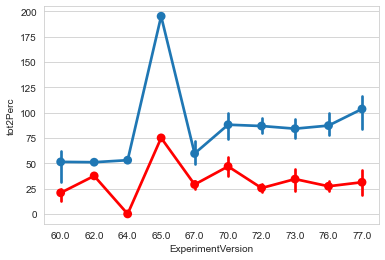

In [393]:
sns.pointplot('ExperimentVersion', 'vidPlayed', data=likertSlim)
sns.pointplot('ExperimentVersion', 'tot2Perc', data=likertSlim, color='r')

In [394]:
print(likertSlim[likertSlim['ExperimentVersion']<66.0][['totPerc','tot1Perc','tot2Perc','ExperimentVersion']])

   totPerc  tot1Perc  tot2Perc  ExperimentVersion
0     25.0      25.0      25.0               60.0
1      5.0       0.0      12.5               60.0
2     25.0      37.5      25.0               60.0
3     40.0      25.0      37.5               62.0
4     10.0       0.0       0.0               64.0
5     60.0      50.0      75.0               65.0


In [395]:
print(stats.ttest_ind(earlyV['totPerc'],lateV['totPerc']))
print(stats.ttest_ind(earlyV['tot1Perc'],lateV['tot1Perc']))
print(stats.ttest_ind(earlyV['tot2Perc'],lateV['tot2Perc']))
print(stats.ttest_ind(earlyV['agTotPerc'],lateV['agTotPerc']))

print(stats.ttest_ind(earlyV['tot1Perc'],earlyV['tot2Perc']))

print(stats.ttest_ind(lateV['tot1Perc'],lateV['tot2Perc']))

Ttest_indResult(statistic=-0.06141578780355841, pvalue=0.9510814139954546)
Ttest_indResult(statistic=0.6060407872977114, pvalue=0.5450853000735092)
Ttest_indResult(statistic=0.5543433644929789, pvalue=0.5798824800240086)
Ttest_indResult(statistic=0.7023964611554343, pvalue=0.4831421956920484)
Ttest_indResult(statistic=-0.10337092802554572, pvalue=0.9177933614742206)
Ttest_indResult(statistic=-0.19822579564206397, pvalue=0.8430054019167396)


In [396]:
print(stats.ttest_ind(earlyV['ratioVidPlaysToAvg'],lateV['ratioVidPlaysToAvg']))

Ttest_indResult(statistic=-0.37502535656143887, pvalue=0.7079871954174304)


In [397]:
print(len(tmp_taskDF))

taskE = taskDF[taskDF['ExperimentVersion']<68.0]
print(len(taskE))
taskL = taskDF[taskDF['ExperimentVersion']>=68.0]
print(len(taskL))

75676
19138
56538


In [398]:
# # print(taskE.Response.unique())
# tmp_taskDF['vidPlayed'] = np.where(tmp_taskDF['Response']=="VIDEO PLAYING EVENT FIRED", 1,
#                              np.where(tmp_taskDF['Response']=="ADJUSTED START TIME based on TIMEUPDATE EVENT", 1,0))

# taskE['vidPlayed'] = np.where(taskE['Response']=="VIDEO PLAYING EVENT FIRED", 1,
#                              np.where(taskE['Response']=="ADJUSTED START TIME based on TIMEUPDATE EVENT", 1,0))


# taskL['vidPlayed'] = np.where(taskL['Response']=="VIDEO PLAYING EVENT FIRED", 1,
#                              np.where(taskL['Response']=="ADJUSTED START TIME based on TIMEUPDATE EVENT", 1,0))


# # taskE_grouped = taskE[taskE['vidPlayed']==1].groupby(['ParticipantPublicID','AgentNum']).sum()
# # taskE_grouped = taskE[taskE['vidPlayed']==1].groupby(['ParticipantPublicID']).sum()
# # print(taskE_grouped[['vidPlayed']])



# print(taskE.Response.unique())
tmp_taskDF['vidPlayed'] = np.where(tmp_taskDF['Response']=="VIDEO PLAYING EVENT FIRED", 1,0)

taskE['vidPlayed'] = np.where(taskE['Response']=="VIDEO PLAYING EVENT FIRED", 1,0)


taskL['vidPlayed'] = np.where(taskL['Response']=="VIDEO PLAYING EVENT FIRED", 1,0)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AgentNum', ylabel='vidPlayed'>

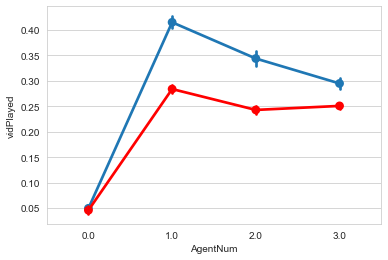

In [399]:
sns.pointplot('AgentNum','vidPlayed',data=taskE)
sns.pointplot('AgentNum','vidPlayed',data=taskL, color='r')

In [401]:
print(likertSlim.ExperimentVersion.unique())
print(likertSlim.columns.tolist())

[60. 62. 64. 65. 67. 70. 72. 73. 76. 77.]
['ParticipantPrivateID', 'difficulty', 'visuals', 'agents', 'QsTotal', 'QsCorrect', 'Agent_QsTotal', 'Agent_QsCorrect', 'Agent_QsWO_GhostsTotal', 'Agent_QsWO_GhostsCorrect', 'Qs1_Correct', 'Qs2_Correct', 'QsPart_Total', 'predictionsCorrect', 'predictionsTotal', 'predictions1Correct', 'predictions2Correct', 'predictionsHalfTotal', 'regionsCorrect', 'regionsTotal', 'regions1Correct', 'regions2Correct', 'regionsHalfTotal', 'levelCorrect', 'levelTotal', 'level1Correct', 'level2Correct', 'levelHalfTotal', 'ghostsCorrect', 'ghostsTotal', 'ghosts1Correct', 'ghosts2Correct', 'ghostsHalfTotal', 'comparisonsCorrect', 'comparisonsTotal', 'timeTakenMain_All', 'timeTakenMain_AgentsOnly', 'timeTaken_Consent', 'timeTaken_Demographics', 'timeTaken_AI', 'timeTaken_Agent1', 'timeTaken_Agent2', 'timeTaken_Agent3', 'time_TOTAL', 'vidPlayed', 'avgVidPlays', 'ratioVidPlaysToAvg', 'ExperimentVersion_x', 'totPerc', 'agTotPerc', 'tot1Perc', 'tot2Perc', 'Agent_QsWO_Ghos

In [430]:
# need to group by agent and sum vidPlayed, then add as new column
testDF = tmp_taskDF.copy()

sum_df = testDF.groupby(['ParticipantPublicID','AgentNum']).agg({'vidPlayed': 'sum'})
print(sum_df)

# Now need to pop into likertSlim based on agentNum and pID
sumT = sum_df.unstack()

print(sumT)
sumT.columns.set_levels(["P0_played","P1_played","P2_played","P3_played"], level=1,inplace=True)
print(sumT)

sumT.columns = sumT.columns.droplevel(0)
print(sumT)

likertTemp = pd.merge(likertSlim,sumT,on='ParticipantPublicID',how="left")
print(likertTemp)

                                   vidPlayed
ParticipantPublicID      AgentNum           
55bac673fdf99b554657f2d6 0.0               1
                         1.0              12
                         2.0              12
                         3.0              32
55cf7e8b34e906000ee56498 0.0               1
...                                      ...
60509f75486b1b5858d5f6dd 3.0              35
6050de36565b8a6c1bd30772 0.0               1
                         1.0              18
                         2.0              16
                         3.0              34

[930 rows x 1 columns]
                         vidPlayed                  
AgentNum                       0.0   1.0   2.0   3.0
ParticipantPublicID                                 
55bac673fdf99b554657f2d6       1.0  12.0  12.0  32.0
55cf7e8b34e906000ee56498       1.0   5.0   4.0   0.0
56db8f127dcddf000dd592af       1.0  23.0  13.0  56.0
572f1c1d3c27e7000f0b31aa       NaN  14.0  14.0  34.0
596e1edd39e9d00001b7

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: inplace is deprecated and will be removed in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [220]:
# tmp = taskL.copy()

# for p_index, pID in enumerate(tmp.ParticipantPublicID.unique()):

#     likertSlim.at[pID,'P1_played'] = tmp.loc[(tmp['ParticipantPublicID'] == pID) & (tmp['AgentNum'] == 1)]['vidPlayed'].sum().astype(int)
# #     print(likertSlim.at[pID,'P1_played'])
#     likertSlim.at[pID,'P2_played'] = tmp.loc[(tmp['ParticipantPublicID'] == pID) & (tmp['AgentNum'] == 2)]['vidPlayed'].sum().astype(int)
#     likertSlim.at[pID,'P3_played'] = tmp.loc[(tmp['ParticipantPublicID'] == pID) & (tmp['AgentNum'] == 3)]['vidPlayed'].sum().astype(int)

# print(likertSlim.at[pID,'P1_played'])
# print(likertSlim.at[pID,'P2_played'])
# print(likertSlim.at[pID,'P3_played'])

In [449]:
likertTemp['diff'] = likertTemp['P1_played'] - likertTemp['P2_played']


# print(likertSlim.at[pID,'P1_played'])
# print(likertSlim.at[pID,'P2_played'])
# print(likertSlim.at[pID,'P3_played'])
# print(likertSlim.at[pID,'diff'])



earlyV = likertTemp.query('ExperimentVersion<68.0').copy()
print(len(earlyV))
print(earlyV['P1_played'])

lateV = likertTemp.query('ExperimentVersion>=68.0').copy()
print(len(lateV))

# print(lateV.at[pID,'P1_played'])
# print(lateV.at[pID,'P2_played'])
# print(lateV.at[pID,'P3_played'])
# print(lateV.at[pID,'diff'])

84
0      9.0
1     17.0
2     30.0
3     23.0
4     41.0
      ... 
79    19.0
80    20.0
81    84.0
82    95.0
83    21.0
Name: P1_played, Length: 84, dtype: float64
148


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


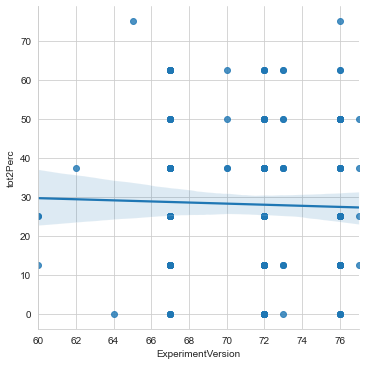

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


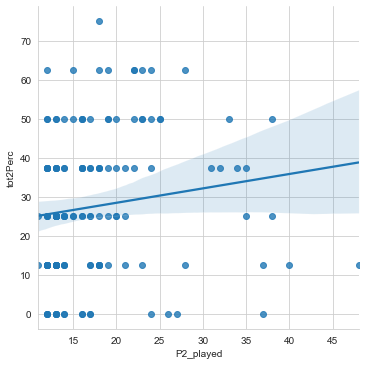

In [450]:
sns.lmplot('ExperimentVersion','tot2Perc',data=likertSlim)
plt.show()
sns.lmplot('P2_played','tot2Perc',data=lateV)

In [451]:
def fancyWilcoxon(a,b,df):
    data1 = df[a]
    data2 = df[b]
    print("\n" + str(a) + ' ' + str(stats.tmean(df[a])) + ' ' + str(stats.tstd(df[a])))
    print(str(b) + ' ' + str(stats.tmean(df[b])) + ' ' + str(stats.tstd(df[b])))
    # Calculate the Wilcoxon signed-rank test.
    return(wilcoxon(data1, data2))

In [452]:
print(wilcoxon(likertTemp[likertTemp['ExperimentVersion']<68.0]['tot2Perc'], likertTemp[likertTemp['ExperimentVersion']<68.0]['tot1Perc']))

WilcoxonResult(statistic=835.0, pvalue=0.8714810260574171)


In [453]:
# print(stats.ttest_ind(earlyV['totPerc'],lateV['totPerc']))
# print(stats.ttest_ind(earlyV['tot1Perc'],lateV['tot1Perc']))
# print(stats.ttest_ind(earlyV['tot2Perc'],lateV['tot2Perc']))
# print(stats.ttest_ind(earlyV['agTotPerc'],lateV['agTotPerc']))
# print(stats.ttest_ind(earlyV['tot1Perc'],earlyV['tot2Perc']))
# print(stats.ttest_ind(lateV['tot1Perc'],lateV['tot2Perc']))
# print(stats.ttest_ind(earlyV['ratioVidPlaysToAvg'],lateV['ratioVidPlaysToAvg']))


print(stats.kruskal(earlyV['totPerc'],lateV['totPerc']))
print(stats.kruskal(earlyV['totPerc'],lateV['totPerc']))
print(stats.kruskal(earlyV['tot1Perc'],lateV['tot1Perc']))
print(stats.kruskal(earlyV['tot2Perc'],lateV['tot2Perc']))
print(stats.kruskal(earlyV['agTotPerc'],lateV['agTotPerc']))
print(stats.kruskal(earlyV['tot1Perc'],earlyV['tot2Perc']))
print(stats.kruskal(lateV['tot1Perc'],lateV['tot2Perc']))
print(stats.kruskal(earlyV['ratioVidPlaysToAvg'],lateV['ratioVidPlaysToAvg']))


KruskalResult(statistic=0.01410993915149613, pvalue=0.9054454829503221)
KruskalResult(statistic=0.01410993915149613, pvalue=0.9054454829503221)
KruskalResult(statistic=0.272137526123384, pvalue=0.6019014926964077)
KruskalResult(statistic=0.17420914929283757, pvalue=0.6763977787276405)
KruskalResult(statistic=0.7001560331072325, pvalue=0.402731269831336)
KruskalResult(statistic=0.018576982975057697, pvalue=0.8915861741922994)
KruskalResult(statistic=0.12028546619832518, pvalue=0.7287250844704163)
KruskalResult(statistic=9.031992591481147, pvalue=0.0026529514419728235)


In [470]:
# NOTE: 1 sample 2 measures non-parametric = Wilcoxon
# NOTE: 2 sample 2 measures non-parametric = MannWhitneyU
#
# print(earlyV['P1_played']==earlyV['P2_played'])
# print(earlyV.at[pID,'P1_played'])
# print(earlyV.at[pID,'P2_played'])
# print(earlyV.at[pID,'P3_played'])


print("Was there a difference between parts one and two? Yes")
# print(lateV['P1_played'].dtypes)
print(stats.wilcoxon(earlyV['P1_played'],earlyV['P2_played']))
# Note, sig diff between played on one and played on two
print(stats.wilcoxon(lateV['P1_played'],lateV['P2_played']))
# note, diff remained after change though

print("Was there a difference between before implemented and after? Yes")
print(stats.mannwhitneyu(earlyV['P1_played'],lateV['P1_played']))
print(stats.mannwhitneyu(earlyV['P2_played'],lateV['P2_played']))
print(stats.mannwhitneyu(earlyV['P3_played'],lateV['P3_played']))
print(stats.mannwhitneyu(earlyV['vidPlayed'],lateV['vidPlayed']))

print("Was there a difference in score before? No")
print(stats.wilcoxon(earlyV['tot1Perc'],earlyV['tot2Perc']))
print("Was there a difference in score after? No")
print(stats.wilcoxon(lateV['tot1Perc'],lateV['tot2Perc']))

print("Was there a difference in score before versus after? No")
print(stats.mannwhitneyu(earlyV['tot1Perc'],lateV['tot1Perc']))
print("p2")
print(stats.mannwhitneyu(earlyV['tot2Perc'],lateV['tot2Perc']))
print("tot")
print(stats.mannwhitneyu(earlyV['totPerc'],lateV['totPerc']))
print(stats.mannwhitneyu(earlyV['agTotPerc'],lateV['agTotPerc']))
print(stats.mannwhitneyu(earlyV['compPerc'],lateV['compPerc']))

Was there a difference between parts one and two? Yes
WilcoxonResult(statistic=342.0, pvalue=8.703623515777698e-10)
WilcoxonResult(statistic=545.0, pvalue=4.09593801770707e-20)
Was there a difference between before implemented and after? Yes
MannwhitneyuResult(statistic=5255.5, pvalue=0.025282528254397838)
MannwhitneyuResult(statistic=3721.5, pvalue=1.778633022574087e-07)
MannwhitneyuResult(statistic=1392.5, pvalue=3.671770304188332e-23)
MannwhitneyuResult(statistic=2679.5, pvalue=3.050820109530759e-13)
Was there a difference in score before? No
WilcoxonResult(statistic=835.0, pvalue=0.8714810260574171)
Was there a difference in score after? No
WilcoxonResult(statistic=3045.0, pvalue=0.9817343260797976)
Was there a difference in score before versus after? No
MannwhitneyuResult(statistic=5966.0, pvalue=0.301314124221732)
p2
MannwhitneyuResult(statistic=6015.0, pvalue=0.338578627735747)
tot
MannwhitneyuResult(statistic=6158.0, pvalue=0.45312841535939713)
MannwhitneyuResult(statistic=5808

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f131d0e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f131de610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f131d0ad0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7f131dee50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f131e9290>,
 'means': []}

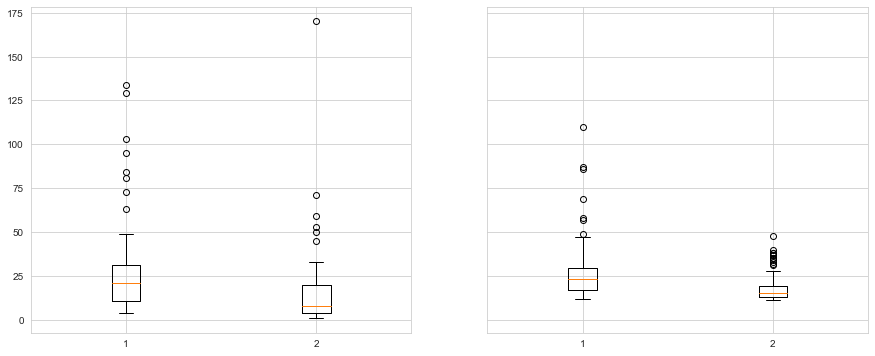

In [455]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6),sharey=True)

data = earlyV[['P1_played','P2_played']]

axes[0].boxplot(data)

data = lateV[['P1_played','P2_played']]

axes[1].boxplot(data)

# data = earlyV[['tot1Perc','tot2Perc']]

# axes[2].boxplot(data)

# data = lateV[['tot1Perc','tot2Perc']]

# axes[2].boxplot(data)

In [467]:
# concatenated = pd.concat([earlyV.assign(dataset='set1'), lateV.assign(dataset='set2')])
# plt.figure(figsize=(15,6))
# sns.scatterplot(x='tot2Perc', y='diff', data=concatenated,
#                 style='dataset')

print("...........................vidPlays1")
print("Mean before")
print(earlyV['P1_played'].mean())
print("Std before")
print(earlyV['P1_played'].std())
print("Mean after")
print(lateV['P1_played'].mean())
print("Std after")
print(lateV['P1_played'].std())

print("...........................vidPlays2")
print("Mean before")
print(earlyV['P2_played'].mean())
print("Std before")
print(lateV['P2_played'].std())
print("Mean after")
print(lateV['P2_played'].mean())
print("Std P2_played")
print(lateV['P2_played'].std())

print("...........................vidPlays3")
print("Mean before")
print(earlyV['P3_played'].mean())
print("Mean after")
print(lateV['P3_played'].mean())

print("...........................diff")
print("Mean before")
print(earlyV['diff'].mean())
print("Mean after")
print(lateV['diff'].mean())

print("Median before")
print(earlyV['diff'].median())
print("Median after")
print(lateV['diff'].median())

print("Mode before")
print(earlyV['diff'].mode())
print("Mode after")
print(lateV['diff'].mode())

print("...........................tot2Perc")

print("Mean before")
print(earlyV['tot2Perc'].mean())
print("Mean after")
print(lateV['tot2Perc'].mean())

print("Median before")
print(earlyV['tot2Perc'].median())
print("Median after")
print(lateV['tot2Perc'].median())

print("Mode before")
print(earlyV['tot2Perc'].mode())
print("Mode after")
print(lateV['tot2Perc'].mode())

print("...........................agTotPerc")

print("Mean before")
print(earlyV['agTotPerc'].mean())
print("Mean after")
print(lateV['agTotPerc'].mean())

print("Median before")
print(earlyV['agTotPerc'].median())
print("Median after")
print(lateV['agTotPerc'].median())

print("Mode before")
print(earlyV['agTotPerc'].mode())
print("Mode after")
print(lateV['agTotPerc'].mode())

print("...........................totPerc")

print("Mean before")
print(earlyV['totPerc'].mean())
print("Mean after")
print(lateV['totPerc'].mean())

print("Median before")
print(earlyV['totPerc'].median())
print("Median after")
print(lateV['totPerc'].median())

print("Mode before")
print(earlyV['totPerc'].mode())
print("Mode after")
print(lateV['totPerc'].mode())

...........................vidPlays1
Mean before
26.678571428571427
Std before
26.058858639572957
Mean after
25.7972972972973
Std after
13.987827292814208
...........................vidPlays2
Mean before
15.297619047619047
Std before
6.976159728651697
Mean after
17.64189189189189
Std P2_played
6.976159728651697
...........................vidPlays3
Mean before
17.05952380952381
Mean after
42.25
...........................diff
Mean before
11.380952380952381
Mean after
8.155405405405405
Median before
8.0
Median after
6.0
Mode before
0    3.0
1    4.0
2    5.0
dtype: float64
Mode after
0     2.0
1    10.0
dtype: float64
...........................tot2Perc
Mean before
29.017857142857142
Mean after
27.618243243243242
Median before
25.0
Median after
25.0
Mode before
0    12.5
dtype: float64
Mode after
0    12.5
dtype: float64
...........................agTotPerc
Mean before
28.86904761904762
Mean after
27.407094594594593
Median before
25.0
Median after
25.0
Mode before
0    25.0
dtype: float6

In [199]:
print(earlyV['P1_played'].mean())
print(earlyV['P2_played'].mean())

print(lateV['P1_played'].mean())
print(lateV['P2_played'].mean())

0.0
0.0
0.0
0.0


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
print(stats.kruskal(earlyV['diff'],lateV['diff']))
print(stats.mannwhitneyu(earlyV['diff'],lateV['diff']))

KruskalResult(statistic=0.27363390100337803, pvalue=0.6009044719676674)
MannwhitneyuResult(statistic=25589.5, pvalue=0.30058105383503875)


In [121]:

from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro

print(lilliefors(earlyV['diff']))
print(lilliefors(lateV['diff']))

print(lilliefors(earlyV['P1_played']))
print(lilliefors(lateV['P1_played']))

print(lilliefors(earlyV['P2_played']))
print(lilliefors(lateV['P2_played']))

print(shapiro(earlyV['diff']))
print(shapiro(lateV['diff']))

print(shapiro(earlyV['P1_played']))
print(shapiro(lateV['P1_played']))

print(shapiro(earlyV['P2_played']))
print(shapiro(lateV['P2_played']))

(0.27903325252111266, 0.0009999999999998899)
(0.2864242488363289, 0.0009999999999998899)
(0.2722461208490881, 0.0009999999999998899)
(0.3058788897450222, 0.0009999999999998899)
(0.30004512707994, 0.0009999999999998899)
(0.32147915669917604, 0.0009999999999998899)
ShapiroResult(statistic=0.6431337594985962, pvalue=7.428523408378139e-19)
ShapiroResult(statistic=0.6433981657028198, pvalue=1.0021397061392802e-24)
ShapiroResult(statistic=0.6411838531494141, pvalue=6.648986848144517e-19)
ShapiroResult(statistic=0.8010982871055603, pvalue=5.343573315407605e-19)
ShapiroResult(statistic=0.557829737663269, pvalue=8.453117007218511e-21)
ShapiroResult(statistic=0.7930875420570374, pvalue=2.3225822808508263e-19)


In [471]:
# # Note that the three terms returned are X² statistic, p-value, and degree of freedom
def testChiCorr(a,b,c):
    ct = pd.crosstab(c[a], c[b], margins=True)
    ar = []
    for i in range(0, len(ct)-1):
        ar.append(list(ct.iloc[i][0:-1].values))
    obs = np.array(ar)
    X, p, degF = stats.chi2_contingency(obs)[0:3]
    if (p<0.05):
        print("\n")
        print(str(a) + " " + str(stats.tmean(c[a])) + " " + str(stats.tstd(c[a])))
        print(str(b) + " " + str(stats.tmean(c[b])) + " " + str(stats.tstd(c[b])))
#     else:
#         print("\n"+ str(a) + " " + str(b))
    return(X, p, degF)

In [475]:
df = likertTemp.copy()
print(df.columns.tolist())

['ParticipantPrivateID', 'difficulty', 'visuals', 'agents', 'QsTotal', 'QsCorrect', 'Agent_QsTotal', 'Agent_QsCorrect', 'Agent_QsWO_GhostsTotal', 'Agent_QsWO_GhostsCorrect', 'Qs1_Correct', 'Qs2_Correct', 'QsPart_Total', 'predictionsCorrect', 'predictionsTotal', 'predictions1Correct', 'predictions2Correct', 'predictionsHalfTotal', 'regionsCorrect', 'regionsTotal', 'regions1Correct', 'regions2Correct', 'regionsHalfTotal', 'levelCorrect', 'levelTotal', 'level1Correct', 'level2Correct', 'levelHalfTotal', 'ghostsCorrect', 'ghostsTotal', 'ghosts1Correct', 'ghosts2Correct', 'ghostsHalfTotal', 'comparisonsCorrect', 'comparisonsTotal', 'timeTakenMain_All', 'timeTakenMain_AgentsOnly', 'timeTaken_Consent', 'timeTaken_Demographics', 'timeTaken_AI', 'timeTaken_Agent1', 'timeTaken_Agent2', 'timeTaken_Agent3', 'time_TOTAL', 'vidPlayed', 'avgVidPlays', 'ratioVidPlaysToAvg', 'ExperimentVersion_x', 'totPerc', 'agTotPerc', 'tot1Perc', 'tot2Perc', 'Agent_QsWO_GhostsPerc', 'predPerc', 'pred1Perc', 'pred2Pe

In [481]:
print(testChiCorr('totPerc','vidPlayed',df))
print(testChiCorr('tot1Perc','vidPlayed',df))
print(testChiCorr('tot2Perc','vidPlayed',df))
print(testChiCorr('agTotPerc','vidPlayed',df))
print(testChiCorr('compPerc','vidPlayed',df))

print(testChiCorr('totPerc','P1_played',df))
print(testChiCorr('tot1Perc','P1_played',df))
print(testChiCorr('tot2Perc','P1_played',df))
print(testChiCorr('agTotPerc','P1_played',df))
print(testChiCorr('compPerc','P1_played',df))

print(testChiCorr('totPerc','P2_played',df))
print(testChiCorr('tot1Perc','P2_played',df))
print(testChiCorr('tot2Perc','P2_played',df))
print(testChiCorr('agTotPerc','P2_played',df))
print(testChiCorr('compPerc','P2_played',df))

(1479.5956026979554, 0.06822277756427952, 1400)
(692.9789555025991, 0.5676690401191855, 700)


tot2Perc 28.125 18.45456278121721
vidPlayed 77.58620689655173 45.11410621401554
(672.5582074539218, 0.020940566532713253, 600)


agTotPerc 27.936422413793103 15.21951565728815
vidPlayed 77.58620689655173 45.11410621401554
(1311.0967753288828, 0.01338590313676988, 1200)
(376.81740979000296, 0.7916992935110762, 400)


totPerc 35.19396551724138 13.967536813608135
P1_played 26.11637931034483 19.201129313674127
(901.053187237599, 0.002275706065660775, 784)
(394.8979808333843, 0.44945311360111573, 392)


tot2Perc 28.125 18.45456278121721
P1_played 26.11637931034483 19.201129313674127
(454.41675097389384, 1.6963157985209475e-05, 336)


agTotPerc 27.936422413793103 15.21951565728815
P1_played 26.11637931034483 19.201129313674127
(807.502908351916, 0.00024035881707106058, 672)
(220.89305009948643, 0.5461473746476015, 224)


totPerc 35.19396551724138 13.967536813608135
P2_played 16.79310344827586 14.30

In [480]:
vis = df.visuals.unique()

print(stats.ttest_ind(df[df['visuals']==vis[0]]['vidPlayed'], \
                     df[df['visuals']==vis[1]]['vidPlayed'], \
                     df[df['visuals']==vis[2]]['vidPlayed'], \
                     df[df['visuals']==vis[3]]['vidPlayed']))
      
print(stats.ttest_ind(df[df['visuals']==vis[0]]['ratioVidPlaysToAvg'], \
                     df[df['visuals']==vis[1]]['ratioVidPlaysToAvg'], \
                     df[df['visuals']==vis[2]]['ratioVidPlaysToAvg'], \
                     df[df['visuals']==vis[3]]['ratioVidPlaysToAvg']))
      
print(stats.ttest_ind(df[df['visuals']==vis[0]]['avgVidPlays'], \
                     df[df['visuals']==vis[1]]['avgVidPlays'], \
                     df[df['visuals']==vis[2]]['avgVidPlays'], \
                     df[df['visuals']==vis[3]]['avgVidPlays']))

TypeError: cannot convert the series to <class 'int'>